# Decision Tree using Python Scikit Learn

Here, we will see the implementation of decision tree classifier and visualize it graphically for the given iris dataset. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the iris dataset
from sklearn.datasets import load_iris

In [3]:
# Loading the iris dataset
iris = load_iris()

In [4]:
# Forming the iris dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Target 
y = pd.Series(iris.target)

In [5]:
# First five rows of the dataframe
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# shape of the dataset
iris_df.shape

(150, 4)

In [7]:
# Information on the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
# datatypes of each attribute
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [9]:
# Check for null values
iris_df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [10]:
# Summary Statistics of the data
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

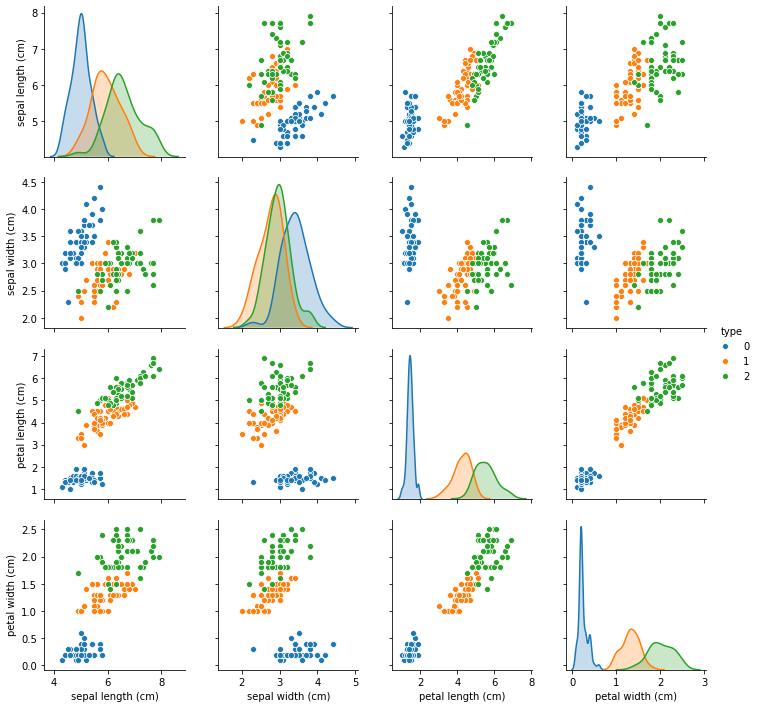

In [11]:
iris_df['type'] = y
sns.pairplot(iris_df,hue='type',x_vars=iris.feature_names,y_vars=iris.feature_names,height=2.5,diag_kind='auto')
plt.show()

This graph is a pairplot which shows the pairwise relationship in the dataset. We can observe the variations in each plot. The diagonal plots are kernel density plots where the other plots are scatter plots.

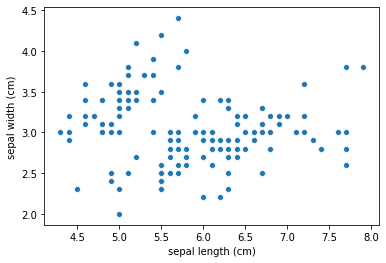

In [12]:
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',data=iris_df)

This graph is a scatter plot which shows the relationship between two numerical variables i.e, the sepal length (cm) on x-axis and sepal width (cm) on y-axis.

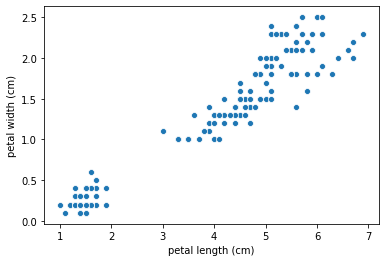

In [13]:
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',data=iris_df)

This graph is again a scatter plot to see the relationship between petal length (cm) and petal width (cm).

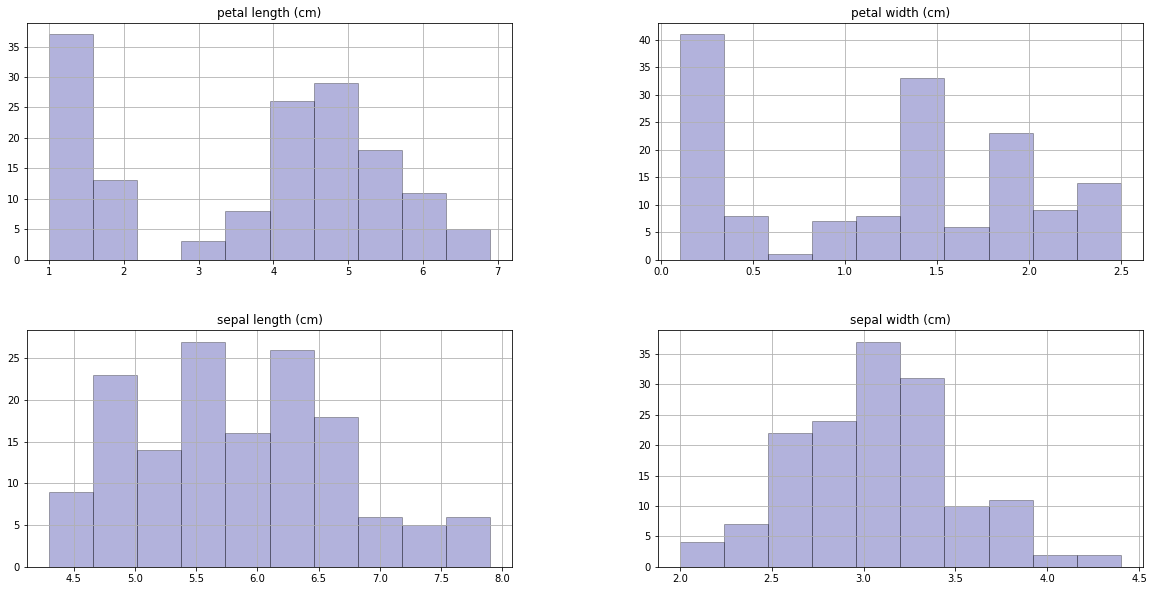

In [14]:
iris_df.iloc[:,:-1].hist(bins=10,figsize=(20,10),grid=True,edgecolor='black',alpha=0.3,color='darkblue')
plt.show()

A histogram is the most commonly used graph to show frequency distributions. Here we can see the frequency distribution of each attribute.

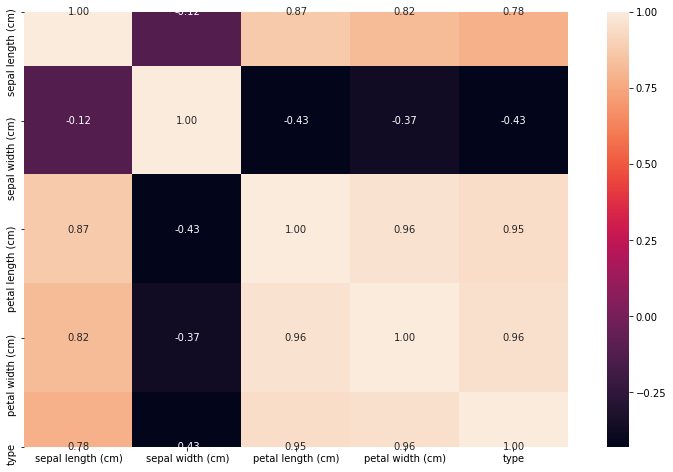

In [15]:
f,ax=plt.subplots(figsize=(14,8))
sns.heatmap(iris_df.corr(),annot=True,linecolor="blue",fmt='.2f',square=True)
plt.show()

 A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. This is a heatmap done on the correlation matrix of the dataset to determine the linear relationship between the variables.

## Decision Tree Classifier

It is a supervised machine learning algorithm used on classification problem statements. First we will import the DecisionTreeClassifer from sklearn.tree module.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [17]:
feature_cols = [x for x in iris_df.columns if x!='type']
X = iris_df[feature_cols] # Independent variables
y = iris_df['type'] # Dependent variable (Target)

In [18]:
# Splitting of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 150)

In [19]:
# Initialising the model
model = DecisionTreeClassifier()
# Fitting the data for training
model.fit(X_train, y_train)
# Predicting the target
y_pred = model.predict(X_test)

In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(10)

,Actual,Predicted
53,1,1
42,0,0
141,2,2
83,1,2
60,1,1
28,0,0
13,0,0
31,0,0
71,1,1
59,1,1


## Evaluating the model

The last step is to evaluate the performance and efficiency of the algorithm. This step becomes useful to compare it with different algorithms working on the same dataset to see which algorithm performs the best. Here, we will use confusion matrix and classification report from sklearn.metrics module for evaluation.

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [22]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[17,  0,  0],
       [ 0, 14,  2],
       [ 0,  0, 12]], dtype=int64)

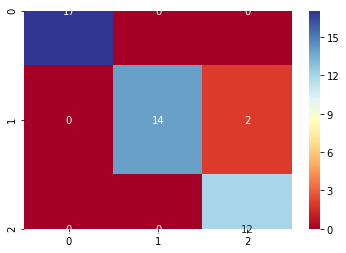

In [23]:
# Heatmap for the confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap='RdYlBu')

In [24]:
# Accuracy of the model prediction
print('Accuracy Score : ',accuracy_score(y_test, y_pred)*100)

Accuracy Score :  95.55555555555556


In [25]:
# Printing the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.88      0.93        16
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



## Plotting the Tree

In [26]:
from sklearn.tree import plot_tree

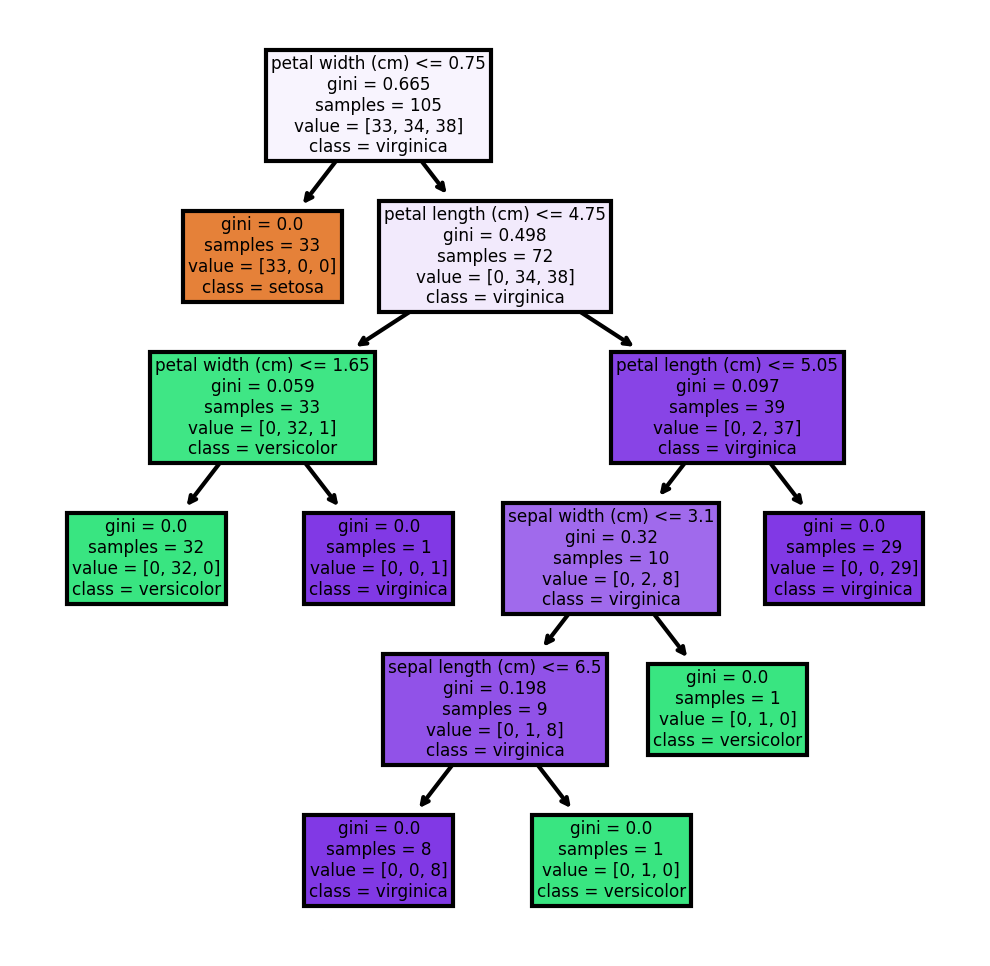

In [27]:
cn=['setosa', 'versicolor', 'virginica']
f, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(model,
          feature_names = feature_cols, 
          class_names=cn,
          filled = True);